# Nathan Lim CSC321 Mastery Extension Project:
# ***Detection of Malicious Network Connections via Machine Learning***

---

This project is based on the KDD Cup 1999 dataset.

**The goal of this project is to train a machine learning model to most accurately classify a network connection as either an attack or a normal connection.**

The observational units in the KDD CUP 1999 dataset are network connections, captured and pre-processed into session-level records. These records represent connections simulated in a military network environment over seven weeks of operation. The dataset was created to evaluate the performance of intrusion detection systems by identifying different types of network attacks. It consists of 4,898,431 connections in the full dataset and 494,021 connections in the 10% sample. There is no missing data in the dataset. For the purposes of this report and the algorithm, we will train our model using the 10% sample dataset and test it on the full dataset.

The dataset contains 41 features, including the connection type, duration, protocol type, service, flag, source bytes, destination bytes, and attack type. The attack types are divided into four categories: denial of service (DoS), user-to-root (U2R), remote-to-local (R2L), and probing. Below is a detailed description of the features in the dataset:

- duration | integer | the length of the connection in seconds.
- protocol_type | categorical | the protocol type of the connection (e.g., TCP, UDP, ICMP).
- service | categorical | the network service on the destination (e.g., http, telnet, ftp).
- flag | categorical | the status of the connection (e.g., SF, S0, REJ).
- src_bytes | integer | the number of data bytes transferred from the source to the destination.
- dst_bytes | integer | the number of data bytes transferred from the destination to the source.
- land | binary | indicates if the connection is from/to the same host/port.
- wrong_fragment | integer | the number of "wrong" fragments.
- urgent | integer | the number of urgent packets.
- hot | integer | the number of "hot" indicators.
- num_failed_logins | integer | the number of failed login attempts.
- logged_in | binary | indicates if the user is logged in.
- num_compromised | integer | the number of compromised conditions.
- root_shell | binary | indicates if a root shell is obtained.
- su_attempted | binary | indicates if "su root" command attempted.
- num_root | integer | the number of "root" accesses during the session.
- num_file_creations | integer | the number of file creations during the session.
- num_shells | integer | the number of shell prompts.
- num_access_files | integer | the number of operations on access control files.
- num_outbound_cmds | integer | the number of outbound commands in an ftp session.
- is_host_login | binary | indicates if the connection is a host login attempt.
- is_guest_login | binary | indicates if the connection is a guest login attempt.
- count | integer | the number of connections to the same host as the current connection in the past two seconds.
- srv_count | integer | the number of connections to the same service as the current connection in the past two seconds.
- serror_rate | continuous | the percentage of connections that have "SYN" errors.
- srv_serror_rate | continuous | the percentage of connections to the same service that have "SYN" errors.
- rerror_rate | continuous | the percentage of connections that have "REJ" errors.
- srv_rerror_rate | continuous | the percentage of connections to the same service that have "REJ" errors.
- same_srv_rate | continuous | the percentage of connections to the same service.
- diff_srv_rate | continuous | the percentage of connections to different services.
- srv_diff_host_rate | continuous | the percentage of connections to different hosts.
- dst_host_count | integer | the number of connections to the same host in the past two seconds.
- dst_host_srv_count | integer | the number of connections to the same service on the same host in the past two seconds.
- dst_host_same_srv_rate | continuous | the percentage of connections to the same service on the same host.
- dst_host_diff_srv_rate | continuous | the percentage of connections to different services on the same host.
- dst_host_same_src_port_rate | continuous | the percentage of connections to the same source port.
- dst_host_srv_diff_host_rate | continuous | the percentage of connections to different hosts on the same service.
- dst_host_serror_rate | continuous | the percentage of connections that have "SYN" errors to the same host.
- dst_host_srv_serror_rate | continuous | the percentage of connections that have "SYN" errors to the same service on the same host.
- dst_host_rerror_rate | continuous | the percentage of connections that have "REJ" errors to the same host.
- dst_host_srv_rerror_rate | continuous | the percentage of connections that have "REJ" errors to the same service on the same host.
- attack | categorical | the type of attack (e.g., normal, DoS, U2R, R2L, probing).

---

**Let's start our investigation by reading in our data and setting up the dataframe.**


In [50]:
import pandas as pd

path_to_10_percent = "data/kddcup.data_10_percent_corrected"
path_to_full = "data/kddcup.data.corrected"  # for later in analysis

columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
           "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
           "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
           "dst_host_srv_rerror_rate", "attack"]
df = pd.read_csv(path_to_10_percent, names=columns)

df



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


**For the purposes of this algorithm, we won't focus on the specific classification of an attack; our main goal is to identify whether an attack occurred or not. We will create a new column called "attack_occurred" that will be a binary column indicating whether an attack occurred or if the connection was normal.**

In [51]:
df["attack_occurred"] = df["attack"].apply(lambda x: 0 if x == "normal." else 1)

**Now that we have our transformed target variable, let's take a look at the distribution of it.**

In [52]:
df["attack_occurred"].value_counts()

attack_occurred
1    396743
0     97278
Name: count, dtype: int64

**The distribution of our target variable in this 10% subset of the data has almost 400,000 attack connections and almost 100,000 normal connections. This indicates that the dataset is highly biased to attack observations and therefore, our ML models will likely have lower levels of recall for the normal connection class than it will the attack connection class. Let's take a closer examination into the features of this dataset. The first thing we will need to train a good model is to take a look at which features in the dataset are important to correct classification. To start, we'll get the feature importance from a trained model using the RandomForestClassifier from scikit-learn. Feature importance, in essence, shows how important a feature was in making the prediction for an observation. Let's take a look.**

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable
X = df.drop(columns=["attack", "attack_occurred"])
y = df["attack_occurred"]

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Preprocess the data using standard scaling and one hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Create and train the model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

model.fit(X, y)

# Get feature importances
importances = model.named_steps["classifier"].feature_importances_
onehot_feature_names = model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = numerical_cols.tolist() + onehot_feature_names.tolist()

# Calculate average importances for categorical columns
cat_importances = {}
for col in categorical_cols:
    col_indices = [i for i, feature in enumerate(feature_names) if feature.startswith(col)]
    cat_importances[col] = np.mean([importances[i] for i in col_indices])

combined_importances = {col: importances[i] for i, col in enumerate(numerical_cols)}
combined_importances.update(cat_importances)

sorted_importances = sorted(combined_importances.items(), key=lambda x: x[1], reverse=True)

print("Feature ranking:")
for i, (feature, importance) in enumerate(sorted_importances):
    print(f"{i + 1}. feature {feature} ({importance})")

Feature ranking:
1. feature count (0.14048243602543165)
2. feature dst_bytes (0.11646231905002244)
3. feature logged_in (0.0703519187577959)
4. feature dst_host_count (0.06233609201851174)
5. feature dst_host_srv_diff_host_rate (0.05887235699668676)
6. feature src_bytes (0.054252093857662435)
7. feature dst_host_same_src_port_rate (0.03714147126088981)
8. feature protocol_type (0.0330556437263817)
9. feature srv_count (0.023763302166866205)
10. feature same_srv_rate (0.022904497655087633)
11. feature dst_host_same_srv_rate (0.02260288859898152)
12. feature diff_srv_rate (0.021412674041052994)
13. feature dst_host_srv_count (0.021392642956177755)
14. feature srv_diff_host_rate (0.019728327965089755)
15. feature dst_host_diff_srv_rate (0.017482385541645957)
16. feature srv_serror_rate (0.008159056527050092)
17. feature hot (0.0076747511253475245)
18. feature serror_rate (0.005960422133581808)
19. feature dst_host_serror_rate (0.0058368059671015295)
20. feature dst_host_rerror_rate (0.005

**Now, it looks like there are a couple big drops in feature importance as we go down in importance--lets visualize this with a graph so we can get a better idea of these changes in slope.**

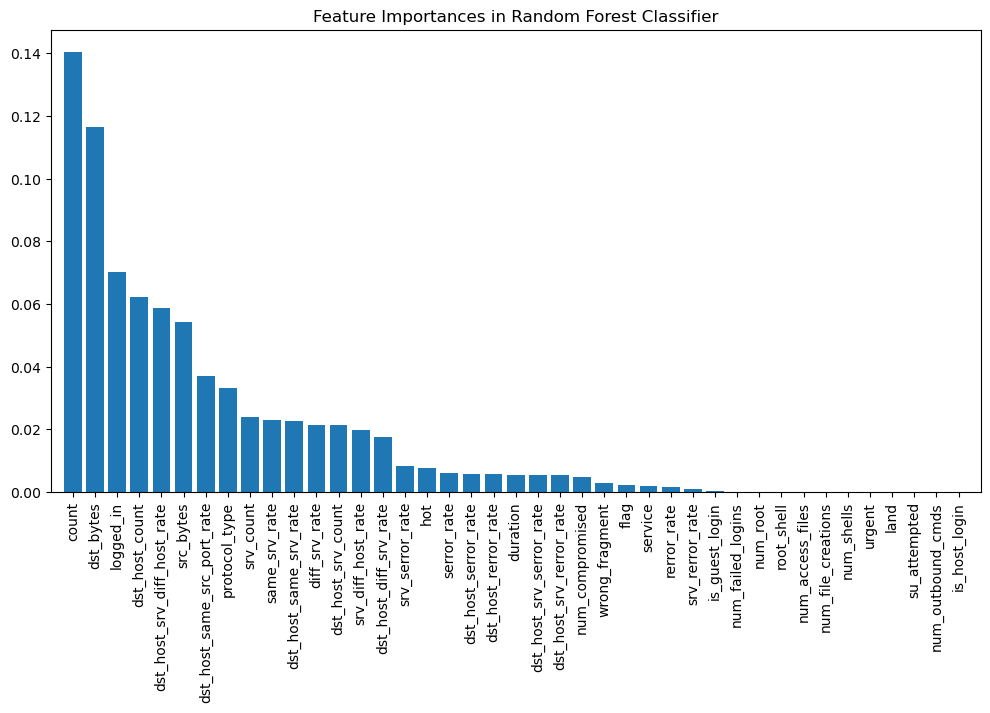

In [54]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Random Forest Classifier")
plt.bar(range(len(sorted_importances)), [imp[1] for imp in sorted_importances], align="center")
plt.xticks(range(len(sorted_importances)), [imp[0] for imp in sorted_importances], rotation=90)
plt.xlim([-1, len(sorted_importances)])
plt.show()

**From the graph above, we can see that "count" and "dst_bytes" are the two most important features by far, with a steep decline until the 9th-15th most important features (srv_count to dst_host_diff_srv_rate), where it flattens out a bit until the 16th most important feature (srv_serror_rate). This is important to note because it indicates that we may be able to reduce the number of features we use in our model without losing much predictive power. In fact, including some of these features on the lower end of this graph may actually hinder our model's performance.**

---

**This is also a fantastic opportunity to examine what might make the count and dst_bytes features the most important features in the dataset. The count feature measures the total number of connections made to the same destination host in the past two seconds, and the dst_bytes feature measures the amount of data sent from the source to the destination during a connection. Count is important for attack detection in attacks like DoS attacks and probing attacks, both of which involve rapidly establishing multiple connections to the same host (to overwhelm in a DoS, or to explore potential vulnerabilities in a probing attack). Count is generally a good indicator of abnormal behavior in general, but especially so for attacks. Number of bytes transferred to destination is also important for attack detection because typical user connections usually transfer a very predictable, normal amount of data. Significant deviations away from this predictable amount are a great indicator that something abnormal, like an attack, is happening.**

---

**I intend to eventually focus on an ML model using a RandomForestClassifier because it is a good model for feature importance and is generally a good model for classification tasks involving large datasets with tabular data--but let's first take a look at some other classification models. I will use the top 15 features from our feature importance analysis to train these models.**

---

**First, let's train and test a logistic regression model. In order to estimate how our model would perform with new data, we'll split our data into two sets: a training set and a test set. We'll train our model using our training set and evaluate its performance on the test set.**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Only use the top 15 features
top_features = [feature for feature, importance in sorted_importances[:15]]

X_top = X[top_features]

# Separate numerical and categorical columns in the top features
numerical_cols_top = [col for col in top_features if col in numerical_cols]
categorical_cols_top = [col for col in top_features if col in categorical_cols]

# Define a new ColumnTransformer for the top features
preprocessor_top = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols_top),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_top)
    ]
)

# Create and train the logistic regression model with the top features
model_top_features = Pipeline(steps=[
    ("preprocessor", preprocessor_top),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model_top_features.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_test = model_top_features.predict(X_test)

# Create a crosstab of actual vs predicted labels for the test set
crosstab = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
print(crosstab)

Predicted      0      1
Actual                 
0          19102    251
1           1093  78359


**The confusion matrix printed above shows the performance results of the logistic regression model on the test set. Out of 19,353 normal connections, the logistic regression model correctly recalled 19,102. Out of 79,472 attack connections, the model correctly recalled 78,359. This corresponds to a recall percentage of 98.70% for the normal connection class and 98.60% for the attack connections. It is peculiar that our attack connection class recall is lower than our normal connection class recall given the distribution of each class within our dataset (much more attack connections), but this discrepancy might be explained by the model's underlying decision boundaries or class-specific misclassification tendencies. In any case, this is a great performance result--but we can do better.**

---

**Let's now transition to my original focus of this report, a random forest classifier. As mentioned previously, random forest classifiers are great for feature classification tasks involving large datasets with tabular data. Random forest classifiers use an ensemble of decision tree classifiers in their predictions; the ensemble model uses voting to combine the results from each decision tree classifier into a final prediction, becoming more reliable than a single decision tree classifier alone.**

In [56]:
from sklearn.model_selection import train_test_split

# Only use the top 15 features
top_features = [feature for feature, importance in sorted_importances[:15]]

X_top = X[top_features]

numerical_cols_top = [col for col in top_features if col in numerical_cols]
categorical_cols_top = [col for col in top_features if col in categorical_cols]

preprocessor_top = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols_top),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_top)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor_top),
    ("classifier", RandomForestClassifier(random_state=42))
])

**To create the best model possible, let's perform hyperparameter tuning via a cross validation grid search to get the best parameters for our model. This type of hyperparameter tuning will systematically test combinations of parameters, evaluating their performance using cross-validation to identify the optimal set of parameters that best optimize the model's accuracy and generalizability on unseen data.**

**NOTE: Running the code below may take a while (~2 minutes on an Apple M3 Pro), as we are performing a grid search to find the best hyperparameters for our model.**

In [57]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for hyperparameter tuning
param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20, 30],
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(model, param_grid, cv=4, n_jobs=-1, verbose=2)
grid_search.fit(X_top, y)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters found:  {'classifier__max_depth': 20, 'classifier__n_estimators': 50}
Best cross-validation score:  0.9940306526110907


**Finally, after we have found the best parameters for our model, let's evaluate our model's performance by splitting the dataset into a training set and a test set. We'll train our model using the training set with our best parameters and then evaluate its performance on the test set. To examine how it did, we can examine a crosstab of the models predictions versus the actual label in the dataset (normal connection vs attack).**

In [58]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor_top),
    ("classifier", RandomForestClassifier(random_state=42, n_estimators=50, max_depth=20))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model.fit(X_train, y_train)

# Run predictions on test set
y_pred_test = model.predict(X_test)

# Create a confusion matrix of actual vs predicted labels for the test set
crosstab = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
print(crosstab)

Predicted      0      1
Actual                 
0          19338     15
1             29  79423


**From the confusion matrix above, we can see that the model is performing extremely well on the test set. Out of 19,353 normal connections, it correctly predicted 19,338. Out of 79,472 attack connections, it correctly predicted 79,423. This corresponds to a recall percentage of 99.92% for the normal connection class and a recall percentage of 99.94% for the attack connection class. As expected, due to the imbalance of normal vs attack connection observations, our model performs ever-so-slightly better (as marginal as it may be) in recalling attack connections compared to recalling normal connections.**

**This is a fantastic result and indicates that our model is performing very well on the test set. Its performance on the test set indicates it would do well with even larger scale new data--but lets put that theory to the test! Let's read in the full-size dataset and test our model on that. Let's also define various test metrics to discuss the results of the model afterwards.**

- **Accuracy**: The proportion of correct predictions out of the total number of predictions.
- **Precision**: The proportion of true positive predictions out of the total number of positive predictions.
- **Recall**: The proportion of true positive predictions out of the total number of actual positive observations.
- **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_full = pd.read_csv(path_to_full, names=columns)

# Add transformed attack_occurred target feature as was in the 10% dataset
df_full["attack_occurred"] = df_full["attack"].apply(lambda x: 0 if x == "normal." else 1)

X_full_test = df_full[top_features]
y_full_test = df_full["attack_occurred"]

# Predict on the full dataset
y_pred_full = model.predict(X_full_test)

# Create a crosstab of actual vs predicted labels for the full dataset
crosstab_full = pd.crosstab(y_full_test, y_pred_full, rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of actual vs predicted labels for the full dataset:\n--------------------")
print(crosstab_full)

accuracy = accuracy_score(y_full_test, y_pred_full)
precision = precision_score(y_full_test, y_pred_full)
recall = recall_score(y_full_test, y_pred_full)
f1 = f1_score(y_full_test, y_pred_full)

print(f"\nTest Metrics\n----------------")
print(f"Accuracy: {accuracy * 100:.6f}%")
print(f"Precision: {precision * 100:.6f}%")
print(f"Recall: {recall * 100:.6f}%")
print(f"F1 Score: {f1 * 100:.6f}%")

Confusion matrix of actual vs predicted labels for the full dataset:
--------------------
Predicted       0        1
Actual                    
0          972450      331
1             300  3925350

Test Metrics
----------------
Accuracy: 99.987118%
Precision: 99.991568%
Recall: 99.992358%
F1 Score: 99.991963%


---

# Conclusion: The Final Model
**Our final model is a random forest classifier model with 50 estimators and a max depth of 20, trained on the following features:**
1) duration
2) src_bytes
3) dst_bytes
4) count
5) srv_count
6) serror_rate
7) srv_serror_rate
8) rerror_rate
9) srv_rerror_rate
10) same_srv_rate
11) diff_srv_rate
12) srv_diff_host_rate
13) dst_host_count
14) dst_host_srv_count
15) dst_host_same_srv_rate

The confusion matrix of the final model shows the performance of our model on the full dataset. Out of 972,781 normal network connections, the model accurately identified 972,450 as normal--just 331 were misclassified as attacks. Out of 3,925,650 attack connections, the model correctly classified 3,925,350 with just 300 misclassified as normal connections. This corresponds to a recall of 99.99% for both the normal connection class and the attack connection class. Furthermore, the model's overall accuracy of 99.987%, precision of 99.992%, and F1 score of 99.992% are all incredibly impressive for a machine learning algorithm. This performance on the full dataset closely mirrors the model's performance on the test set, proving the model's effectiveness with predicting new connections that hadn't used for training.

**For further analysis of our model, let's take one last look at feature importance in the final model. We can use the same code as before to get the feature importances from the trained model and visualize them in a graph.**

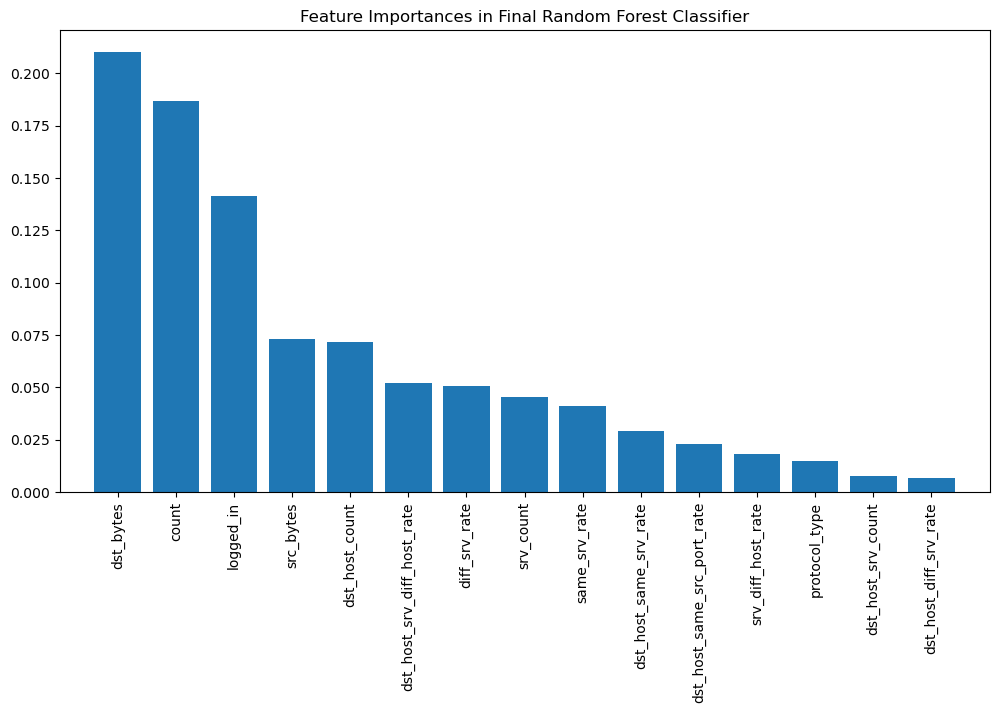

In [60]:
# Get feature importances from the final model
importances = model.named_steps["classifier"].feature_importances_
onehot_feature_names = model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_cols_top)
feature_names = numerical_cols_top + onehot_feature_names.tolist()

# Calculate average importances for categorical columns
cat_importances = {}
for col in categorical_cols_top:
    col_indices = [i for i, feature in enumerate(feature_names) if feature.startswith(col)]
    cat_importances[col] = np.mean([importances[i] for i in col_indices])

combined_importances = {col: importances[i] for i, col in enumerate(numerical_cols_top)}
combined_importances.update(cat_importances)

sorted_importances = sorted(combined_importances.items(), key=lambda x: x[1], reverse=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Final Random Forest Classifier")
plt.bar(range(len(sorted_importances)), [imp[1] for imp in sorted_importances], align="center")
plt.xticks(range(len(sorted_importances)), [imp[0] for imp in sorted_importances], rotation=90)
plt.xlim([-1, len(sorted_importances)])
plt.show()

**The graph above shows the feature importance in the final random forest classifier model. As expected, the top important features in the final model are the same as the top important features in the initial model, with "count" and "dst_bytes" being the most important features. As stated before, it makes sense that these features are at the top because of their relation to common attacks like DoS attacks. Interestingly, the "logged_in" feature also rose to similar importance, which makes sense because failed logins often signal brute-force attempts and combined with high activity even further indicates abnormal behavior than that of a regular user. Additionally, "src_bytes" and "dst_host_count" were the number 4 and 5 in feature importance, further revealing what were the greatest signs of a malicious connection; the feature "src_bytes" reflects the amount of data sent by the source during a session, which can reveal unusual data transfer behaviors characteristic of certain attacks like data exfiltration or scanning activities. Similarly, dst_host_count measures the number of connections made to a specific destination host, also a telltale sign of an attack in attacks like DoS.**

---

The performance metrics of this machine learning model to detect malicious network connections reinforce the fact that machine learning and AI can greatly enhance cybersecurity efforts. Algorithms like this model can be used to detect and prevent cyberattacks in real-time, faster than any human could analyze. The model's high accuracy, precision, recall, and F1 score prove the model's effectiveness in identifying both normal and attack connections. Unfortunately, the nature of network attacks is changing every day--training a machine learning algorithm like this using a dataset from 1999 is probably not ideal for detecting modern day attacks. I doubt that this model would have the same performance metrics if it was used to predict network attacks happening right this moment; however, the model's performance on this dataset shows the potential for AI and machine learning in cybersecurity applications, specifically in real-time network intrusion detection systems. This is not a new idea--machine learning algorithms have been used for years now in cybersecurity applications and are a big subject of ongoing research in the field, but the performance of this model shows just how easy it is to create powerful machine learning algorithms to use in cybersecurity applications.

